In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

## Laborator: exerciţii şi probleme

__Q1__. Pentru swiss dataset, realizați modelul de regresie liniară pentru Fertility în funcție de Agriculture și Education. Remarcați intercept și cei doi coeficienți.

Mai departe arătați cum coeficientul regresorului $x_1$ (Agriculture) este de fapt coeficientul regresiei caracteristice răspunsului $y$ (Fertility) și regresorului $x_2$ (Education) din care contribuția celuilalt regresor ($x_1$) a fost deja înlăturată.

__Hint1__: contribuția unui regresor nu mai este prezentă în reziduul asociat, și se înlătură folosind regresia liniară (revedeți slide-urile 42-end din cursul 7).

__Hint2__: folosiți proprietatea .resid a modelului deja potrivit.

In [2]:
swiss = pd.read_csv('swiss.csv')
swiss.columns = ['District', 'Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 
                 'InfantMortality']
swiss.head()

,District,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
lm_a = smf.ols(formula='Fertility ~ Agriculture + Education', data=swiss).fit()
lm_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     17.95
Date:                Tue, 26 May 2020   Prob (F-statistic):           2.00e-06
Time:                        12:33:22   Log-Likelihood:                -170.85
No. Observations:                  47   AIC:                             347.7
Df Residuals:                      44   BIC:                             353.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.0801      5.782     14.542      0.000      72.428      95.733
Agriculture    -0.0665      0.080     -0.830      0.411      -0.228       0.095
Education      -0.9628      0.189     -5.092      0.000      -1.344      -0.582
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.366
Skew:                           0.374   Prob(JB):                        0.306
Kurtosis:                       2.195   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
print(f'R Q1. a)')

intercept = lm_a.params[0]
print(f'Intercept: {intercept}')

print(f'Coeficient Agriculture: {lm_a.params[1]}')
print(f'Coeficient Education: {lm_a.params[2]}')

R Q1. a)
Intercept: 84.0800539699454
Coeficient Agriculture: -0.06647501991722284
Coeficient Education: -0.962762624349856


In [5]:
x1 = 'Agriculture'
x2 = 'Education'
y = 'Fertility'

lm_x1 = smf.ols(formula='Agriculture ~ Education', data=swiss).fit()
print('Agriculture ~ Education')
print(lm_x1.params)

lm_x2 = smf.ols(formula='Fertility ~ Education', data=swiss).fit()
print('Fertility ~ Education')
print(lm_x2.params)

Agriculture ~ Education
Intercept    67.243236
Education    -1.510527
dtype: float64
Fertility ~ Education
Intercept    79.610059
Education    -0.862350
dtype: float64


In [6]:
print(f'R Q1. b)')

swiss['residAgriculture'] = lm_x1.resid
swiss['residFertility'] = lm_x2.resid

lm = smf.ols(formula='residFertility ~ residAgriculture - 1', data=swiss).fit()
lm.summary()

R Q1. b)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         residFertility   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.7210
Date:                Tue, 26 May 2020   Prob (F-statistic):                       0.400
Time:                        12:33:22   Log-Likelihood:                         -170.85
No. Observations:                  47   AIC:                                      343.7
Df Residuals:                      46   BIC:                                      345.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
residAgriculture    -0.0665      0.078     -0.849      0.400      -0.224       0.091
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.366
Skew:                           0.374   Prob(JB):                        0.306
Kurtosis:                       2.195   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
print(f'R Q1. b)')

lm = smf.ols(formula='Fertility ~ Agriculture + Education', data=swiss).fit()
lm.summary()

R Q1. b)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     17.95
Date:                Tue, 26 May 2020   Prob (F-statistic):           2.00e-06
Time:                        12:33:22   Log-Likelihood:                -170.85
No. Observations:                  47   AIC:                             347.7
Df Residuals:                      44   BIC:                             353.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.0801      5.782     14.542      0.000      72.428      95.733
Agriculture    -0.0665      0.080     -0.830      0.411      -0.228       0.095
Education      -0.9628      0.189     -5.092      0.000      -1.344      -0.582
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.366
Skew:                           0.374   Prob(JB):                        0.306
Kurtosis:                       2.195   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2__. Pentru setul mtcars, considerați variabila categorială 'număr de cilindri'.

a) Ridicați diagrama pair plot.

b) Calculați coeficienții de regresie. Există variabile care par să explice consumul?

c) Ridicați pe un scatter plot regresia mpg funcție de horsepower.

d) În funcție și de numărul de cilindri, realizați două linii de regresie dacă presupunem că nu există interacțiune între horsepower și numărul de cilindri.

e) În funcție și de numărul de cilindri, realizați două linii de regresie dacă presupunem acum că există totuși interacțiune.

In [8]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


R Q2. a) Pair plot pentru "cyl".


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


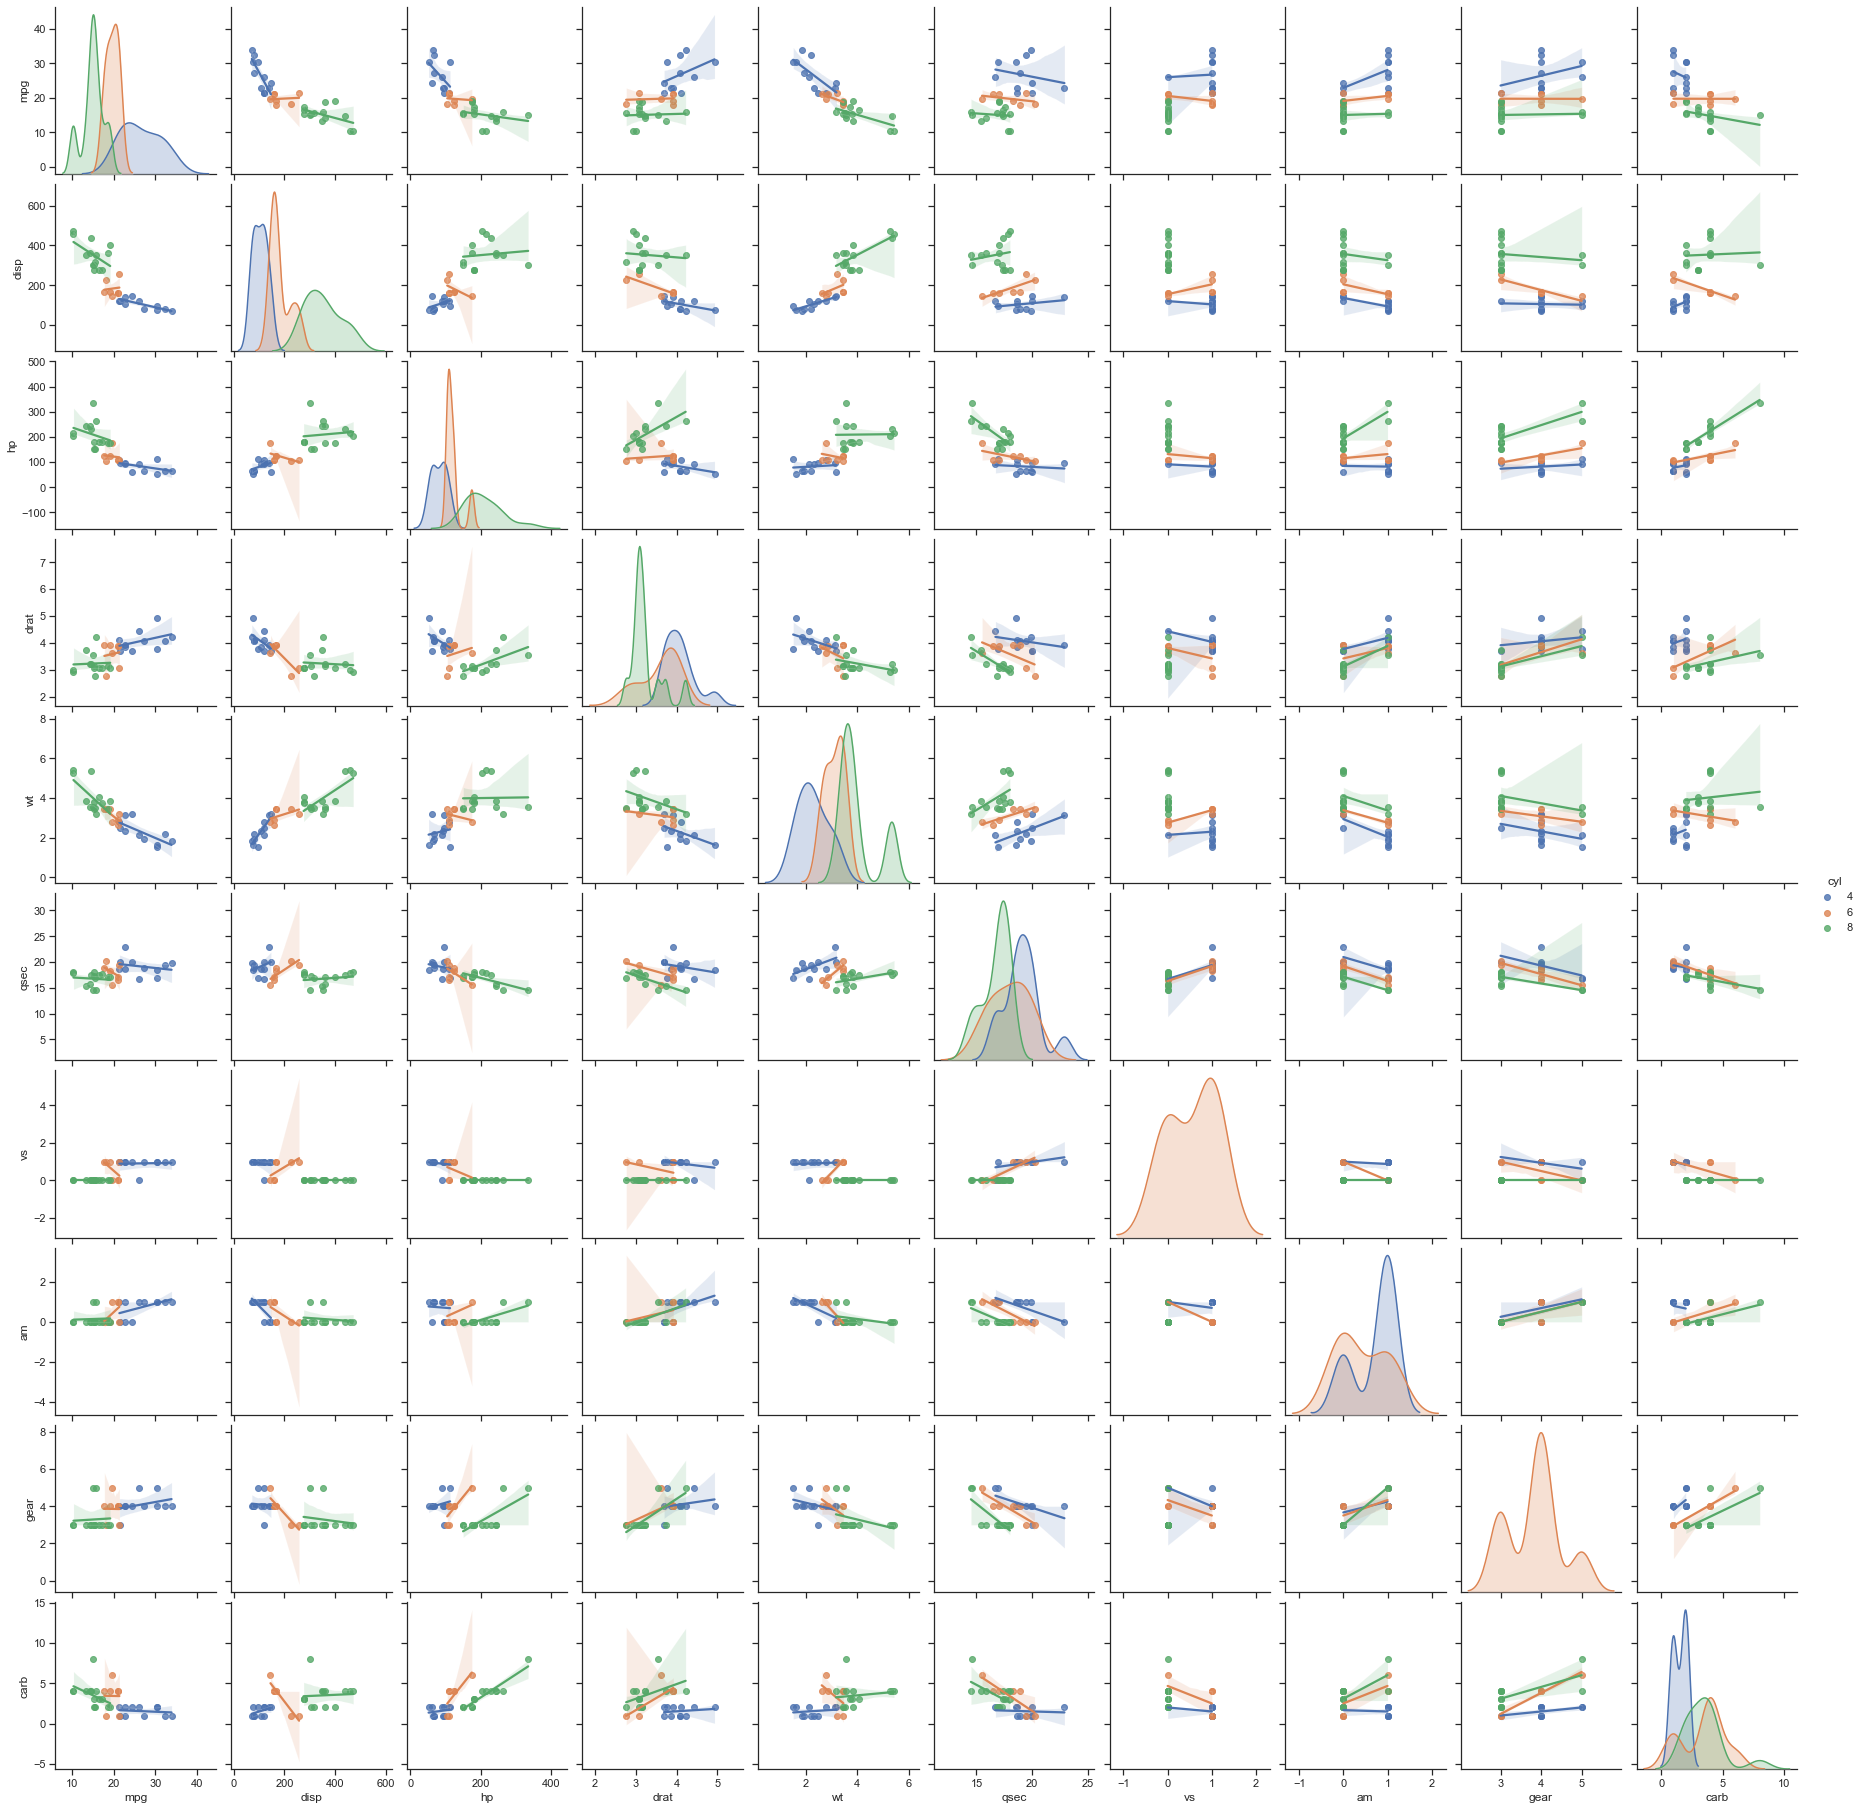

In [10]:
print(f'R Q2. a) Pair plot pentru "cyl".')

cyl = mtcars['cyl']

sns.set(style='ticks') #trage linii de la cifrele de sub grafic catre grafic
sns.pairplot(mtcars, hue='cyl', kind='reg')
plt.show()

In [11]:
print(f'R Q2. b) Coeficientii de regresie "cyl".')
print()

lm = smf.ols(formula='cyl ~ mpg + disp + hp + drat + wt + qsec + vs + am + gear + carb', 
             data=mtcars).fit()
print(lm.params)
lm.summary()

R Q2. b) Coeficientii de regresie "cyl".

Intercept    12.107199
mpg          -0.004857
disp          0.004610
hp            0.003723
drat         -0.427435
wt           -0.222489
qsec         -0.187945
vs           -0.644076
am           -0.500770
gear         -0.500323
carb          0.179872
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cyl   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     30.20
Date:                Tue, 26 May 2020   Prob (F-statistic):           3.16e-10
Time:                        12:34:30   Log-Likelihood:                -19.725
No. Observations:                  32   AIC:                             61.45
Df Residuals:                      21   BIC:                             77.57
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1072      2.933      4.128      0.000       6.008      18.207
mpg           -0.0049      0.046     -0.107      0.916      -0.100       0.090
disp           0.0046      0.004      1.266      0.219      -0.003       0.012
hp             0.0037      0.005      0.813      0.425      -0.006       0.013
drat          -0.4274      0.330     -1.294      0.210      -1.114       0.260
wt            -0.2225      0.427     -0.521      0.608      -1.111       0.666
qsec          -0.1879      0.152     -1.239      0.229      -0.503       0.127
vs            -0.6441      0.417     -1.546      0.137      -1.510       0.222
am            -0.5008      0.431     -1.162      0.258      -1.397       0.395
gear          -0.5003      0.294     -1.705      0.103      -1.111       0.110
carb           0.1799      0.169      1.066      0.299      -0.171       0.531
==============================================================================
Omnibus:                        0.519   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.642
Skew:                          -0.230   Prob(JB):                        0.725
Kurtosis:                       2.481   Cond. No.                     9.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print(f'R Q2. b) Coeficientii de regresie "mpg".')
print()

lm = smf.ols(formula='mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb', 
             data=mtcars).fit()
print(lm.params)
lm.summary()

R Q2. b) Coeficientii de regresie "mpg".

Intercept    12.303374
cyl          -0.111440
disp          0.013335
hp           -0.021482
drat          0.787111
wt           -3.715304
qsec          0.821041
vs            0.317763
am            2.520227
gear          0.655413
carb         -0.199419
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 26 May 2020   Prob (F-statistic):           3.79e-07
Time:                        12:34:30   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print(f'R Q2. b) Consumul este explicat de variabila "wt" si "am".')

R Q2. b) Consumul este explicat de variabila "wt" si "am".


In [14]:
lm = smf.ols(formula='mpg ~ hp', data=mtcars).fit()
print(lm.params)
lm.summary()

Intercept    30.098861
hp           -0.068228
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.79e-07
Time:                        12:34:30   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R Q2. c) Scatter plot "mpg" in functie de horsepower.


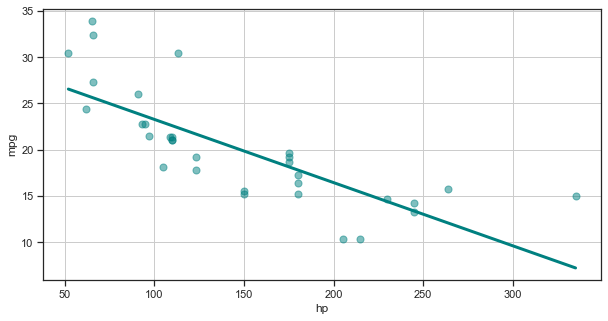

In [15]:
print(f'R Q2. c) Scatter plot "mpg" in functie de horsepower.')

hp = mtcars['hp'].values #X
mpg = mtcars['mpg'].values #Y

beta0 = lm.params[0] #lm 'mpg ~ hp'
beta1 = lm.params[1]

hp_mean = np.mean(hp)

x1 = np.linspace(np.min(hp), np.max(hp), 100)
y1 = beta0 + beta1 * x1

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(hp, mpg, c='teal', alpha=0.5, s=50)
ax.plot(x1, y1, lw=3, c='teal')
ax.set(xlabel='hp', ylabel='mpg')
ax.grid(True)
plt.show()

R Q2. d) Lipsa interactiune intre horsepower si numarul de cilindri.


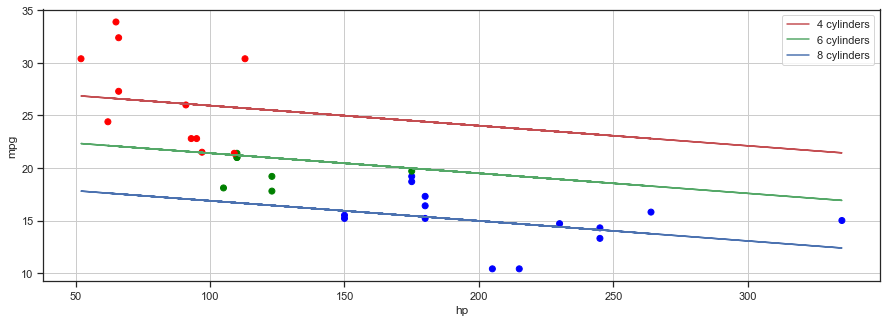

In [16]:
print(f'R Q2. d) Lipsa interactiune intre horsepower si numarul de cilindri.')

params = smf.ols(formula='mpg ~ hp + cyl', data=mtcars).fit().params

x = hp #determinat mai sus din mtcars.csv
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

c = mtcars['cyl'].copy()
c[mtcars['cyl'] == 4] = 'Red'
c[mtcars['cyl'] == 6] = 'Green'
c[mtcars['cyl'] == 8] = 'Blue'
ax.scatter(hp, mpg, c=c)

ax.plot(x, params[0] + params[1] * x + params[2] * 4, 'r')
ax.plot(x, params[0] + params[1] * x + params[2] * 6, 'g')
ax.plot(x, params[0] + params[1] * x + params[2] * 8, 'b')
ax.set_xlabel('hp')
ax.set_ylabel('mpg')
ax.legend(['4 cylinders', '6 cylinders', '8 cylinders'])
plt.grid()
plt.show()

R Q2. e) Exista interactiune intre horsepower si numarul de cilindri.


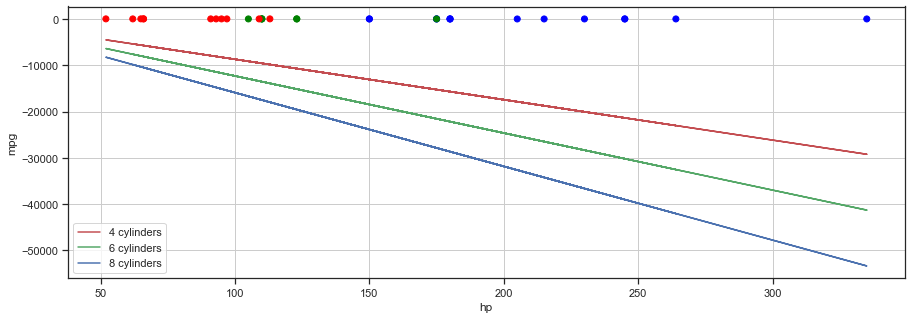

In [17]:
print(f'R Q2. e) Exista interactiune intre horsepower si numarul de cilindri.')

formula = 'mpg ~ hp * C(cyl)'

params = smf.ols(formula=formula, data=mtcars).fit().params

x = hp #determinat mai sus din mtcars.csv
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

c = mtcars['cyl'].copy()
c[mtcars['cyl'] == 4] = 'Red'
c[mtcars['cyl'] == 6] = 'Green'
c[mtcars['cyl'] == 8] = 'Blue'
ax.scatter(hp, mpg, c=c)

ax.plot(x, params[0] + params[1] * x + (params[2] + params[3]) * x * 4, 'r')
ax.plot(x, params[0] + params[1] * x + (params[2] + params[3]) * x * 6, 'g')
ax.plot(x, params[0] + params[1] * x + (params[2] + params[3]) * x * 8, 'b')
ax.set_xlabel('hp')
ax.set_ylabel('mpg')
ax.legend(['4 cylinders', '6 cylinders', '8 cylinders'])
plt.grid()
plt.show()

In [18]:
lm = smf.ols(formula=formula, data=mtcars).fit() #lm 'mpg ~ hp * C(cyl)'
print(lm.params)
lm.summary()

Intercept         35.983026
C(cyl)[T.6]      -15.309175
C(cyl)[T.8]      -17.902952
hp                -0.112776
hp:C(cyl)[T.6]     0.105163
hp:C(cyl)[T.8]     0.098532
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     19.35
Date:                Tue, 26 May 2020   Prob (F-statistic):           5.02e-08
Time:                        12:34:31   Log-Likelihood:                -77.542
No. Observations:                  32   AIC:                             167.1
Df Residuals:                      26   BIC:                             175.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         35.9830      3.889      9.252      0.000      27.989      43.977
C(cyl)[T.6]      -15.3092      7.435     -2.059      0.050     -30.591      -0.027
C(cyl)[T.8]      -17.9030      5.260     -3.404      0.002     -28.714      -7.092
hp                -0.1128      0.046     -2.465      0.021      -0.207      -0.019
hp:C(cyl)[T.6]     0.1052      0.068      1.536      0.137      -0.036       0.246
hp:C(cyl)[T.8]     0.0985      0.049      2.026      0.053      -0.001       0.198
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.862
Skew:                           0.393   Prob(JB):                        0.650
Kurtosis:                       3.165   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""